<a href="https://colab.research.google.com/github/jkf87/hands-on-openai-cookbook-kr/blob/main/introduction_to_gpt4o_ipynb%EC%98%88%EC%A0%9C_%ED%95%9C%EA%B5%AD%EC%96%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPT-4o 소개
GPT-4o("o"는 "omni"를 의미함)은 텍스트, 오디오, 비디오 입력을 처리할 수 있도록 설계되었으며, 텍스트, 오디오 및 이미지 형식으로 출력할 수 있습니다.

### 배경
GPT-4o 이전에는 사용자가 음성 모드로 ChatGPT와 상호작용할 수 있었으며, 이는 세 개의 별도 모델로 운영되었습니다. GPT-4o는 이러한 기능을 텍스트, 비전 및 오디오 전반에 걸쳐 훈련된 단일 모델로 통합할 것입니다. 이 통합 접근 방식은 텍스트, 시각 또는 청각 등 모든 입력이 동일한 신경망에 의해 일관되게 처리되도록 보장합니다.

### 현재 API 기능
현재 API는 `{text, image}` 입력만 지원하며 `{text}` 출력을 제공합니다. 이는 `gpt-4-turbo`와 동일한 형식입니다. 오디오를 포함한 추가 모달리티는 곧 도입될 예정입니다. 이 가이드는 GPT-4o를 사용하여 텍스트, 이미지 및 비디오를 이해하는 방법에 대해 설명합니다.



## Getting Started

### Install OpenAI SDK for Python



In [ ]:
%pip install --upgrade openai --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00


### OpenAI 클라이언트 구성 및 테스트 요청 제출
클라이언트를 설정하려면 요청에 사용할 API 키를 생성해야 합니다. 이미 API 키가 있는 경우 이 단계를 건너뛸 수 있습니다.

API 키를 얻으려면 다음 단계를 따르십시오:
1. [새 프로젝트 생성](https://help.openai.com/en/articles/9186755-managing-your-work-in-the-api-platform-with-projects)
2. [프로젝트에서 API 키 생성](https://platform.openai.com/api-keys)
3. (권장하지만 필수는 아님) [모든 프로젝트에 대해 API 키를 환경 변수로 설정](https://platform.openai.com/docs/quickstart/step-2-set-up-your-api-key)

이 설정을 완료한 후, 첫 번째 요청으로 모델에 간단한 {text} 입력을 해보겠습니다. 첫 번째 요청에는 `system` 및 `user` 메시지를 모두 사용하고, `assistant` 역할의 응답을 받게 됩니다.


In [ ]:
from openai import OpenAI
import os

## Set the API key and model name
MODEL="gpt-4o"
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", "sk-"))


In [ ]:
completion = client.chat.completions.create(
  model=MODEL,
  messages=[
    {"role": "system", "content": "You are a helpful assistant. Help me with my math homework!"}, # <-- This is the system message that provides context to the model
    {"role": "user", "content": "Hello! Could you solve 2+2?"}  # <-- This is the user message for which the model will generate a response
  ]
)

print("Assistant: " + completion.choices[0].message.content)

Assistant: Of course! The sum of 2 + 2 is 4.


## 이미지 처리
GPT-4o는 이미지를 직접 처리하고 이미지에 기반한 지능적인 작업을 수행할 수 있습니다. 이미지를 두 가지 형식으로 제공할 수 있습니다:
1. Base64 인코딩
2. URL

먼저 사용할 이미지를 확인한 후, 이 이미지를 Base64 및 URL 링크 형식으로 API에 보내 보겠습니다.


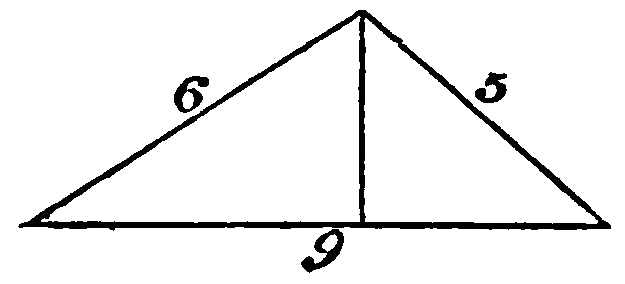

In [ ]:
from IPython.display import Image, display, Audio, Markdown
import base64

IMAGE_PATH = "triangle.png"

# Preview image for context
display(Image(IMAGE_PATH))

#### Base64 Image Processing

In [ ]:
# Open the image file and encode it as a base64 string
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "What's the area of the triangle?"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

To find the area of the triangle, we can use Heron's formula. Heron's formula states that the area of a triangle with sides of length \(a\), \(b\), and \(c\) is:

\[ \text{Area} = \sqrt{s(s-a)(s-b)(s-c)} \]

where \(s\) is the semi-perimeter of the triangle:

\[ s = \frac{a + b + c}{2} \]

In this triangle, the sides are \(a = 5\), \(b = 6\), and \(c = 9\).

First, calculate the semi-perimeter \(s\):

\[ s = \frac{5 + 6 + 9}{2} = \frac{20}{2} = 10 \]

Now, apply Heron's formula:

\[ \text{Area} = \sqrt{10(10-5)(10-6)(10-9)} \]
\[ \text{Area} = \sqrt{10 \cdot 5 \cdot 4 \cdot 1} \]
\[ \text{Area} = \sqrt{200} \]
\[ \text{Area} = 10\sqrt{2} \]

So, the area of the triangle is \(10\sqrt{2}\) square units.


#### URL Image Processing

In [ ]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "What's the area of the triangle?"},
            {"type": "image_url", "image_url": {
                "url": "https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

To find the area of the triangle, we can use Heron's formula. First, we need to find the semi-perimeter of the triangle.

The sides of the triangle are 6, 5, and 9.

1. Calculate the semi-perimeter (s):
\[ s = \frac{a + b + c}{2} = \frac{6 + 5 + 9}{2} = \frac{20}{2} = 10 \]

2. Use Heron's formula to find the area (A):
\[ A = \sqrt{s(s-a)(s-b)(s-c)} \]
\[ A = \sqrt{10(10-6)(10-5)(10-9)} \]
\[ A = \sqrt{10 \times 4 \times 5 \times 1} \]
\[ A = \sqrt{200} \]
\[ A = 10\sqrt{2} \]

So, the area of the triangle is \( 10\sqrt{2} \) square units.


## 비디오 처리
비디오를 API에 직접 보낼 수는 없지만, GPT-4o는 프레임을 샘플링하여 이미지를 제공하면 비디오를 이해할 수 있습니다. 이 작업에서는 GPT-4 Turbo보다 뛰어난 성능을 보입니다.

2024년 5월 현재, GPT-4o API는 오디오 입력을 아직 지원하지 않으므로, 제공된 비디오의 오디오와 비주얼을 처리하기 위해 GPT-4o와 Whisper를 조합하여 두 가지 사용 사례를 소개하겠습니다:
1. 요약
2. 질문과 답변


### 비디오 처리 설정
비디오 처리를 위해 opencv-python과 moviepy 두 가지 파이썬 패키지를 사용할 것입니다.

이들은 [ffmpeg](https://ffmpeg.org/about.html)을 필요로 하므로, 사전에 이를 설치해야 합니다. 운영 체제에 따라 `brew install ffmpeg` 또는 `sudo apt install ffmpeg` 명령을 실행해야 할 수 있습니다.


In [ ]:
%pip install opencv-python --quiet
%pip install moviepy --quiet

### Process the video into two components: frames and audio

In [ ]:
import cv2
from moviepy.editor import VideoFileClip
import time
import base64

# We'll be using the OpenAI DevDay Keynote Recap video. You can review the video here: https://www.youtube.com/watch?v=h02ti0Bl6zk
VIDEO_PATH = "keynote_recap.mp4"

In [ ]:
def process_video(video_path, seconds_per_frame=2):
    base64Frames = []
    base_video_path, _ = os.path.splitext(video_path)

    video = cv2.VideoCapture(video_path)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv2.CAP_PROP_FPS)
    frames_to_skip = int(fps * seconds_per_frame)
    curr_frame=0

    # Loop through the video and extract frames at specified sampling rate
    while curr_frame < total_frames - 1:
        video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame)
        success, frame = video.read()
        if not success:
            break
        _, buffer = cv2.imencode(".jpg", frame)
        base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
        curr_frame += frames_to_skip
    video.release()

    # Extract audio from video
    audio_path = f"{base_video_path}.mp3"
    clip = VideoFileClip(video_path)
    clip.audio.write_audiofile(audio_path, bitrate="32k")
    clip.audio.close()
    clip.close()

    print(f"Extracted {len(base64Frames)} frames")
    print(f"Extracted audio to {audio_path}")
    return base64Frames, audio_path

# Extract 1 frame per second. You can adjust the `seconds_per_frame` parameter to change the sampling rate
base64Frames, audio_path = process_video(VIDEO_PATH, seconds_per_frame=1)


MoviePy - Writing audio in keynote_recap.mp3


MoviePy - Done.
Extracted 218 frames
Extracted audio to keynote_recap.mp3


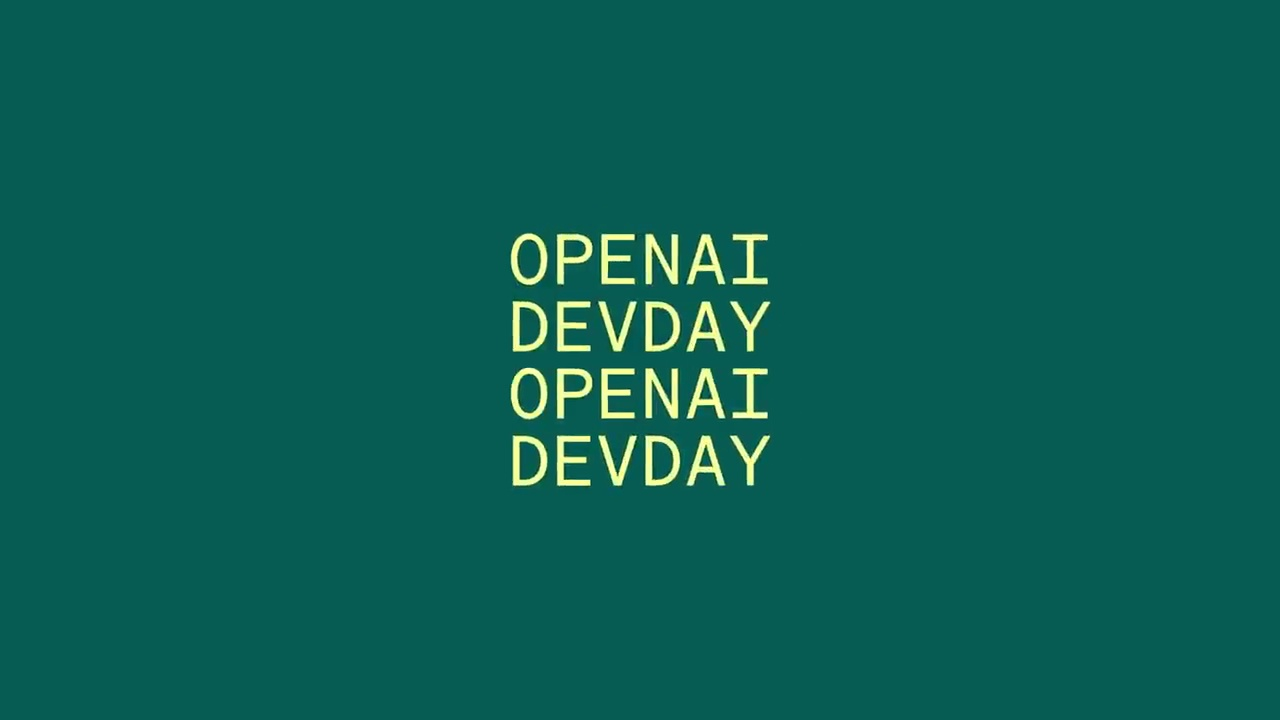

In [ ]:
## Display the frames and audio for context
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8")), width=600))
    time.sleep(0.025)

Audio(audio_path)

### 예제 1: 요약
이제 비디오 프레임과 오디오를 모두 얻었으므로, 모델을 사용하여 다양한 모달리티로 비디오 요약을 생성하고 결과를 비교하는 몇 가지 테스트를 실행해 보겠습니다. 시각적 입력과 오디오 입력 모두에서 컨텍스트를 사용하는 경우 생성된 요약이 가장 정확할 것으로 예상됩니다. 모델이 비디오의 전체 컨텍스트를 사용할 수 있기 때문입니다.

1. 시각적 요약
2. 오디오 요약
3. 시각적 + 오디오 요약

#### 시각적 요약
시각적 요약은 모델에 비디오의 프레임만 보내어 생성됩니다. 프레임만으로는 시각적 측면은 포착할 수 있지만, 발표자가 논의하는 세부 사항은 놓치게 됩니다.


In [ ]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content": "You are generating a video summary. Please provide a summary of the video. Respond in Markdown. 한국어로 답변해줘"},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url",
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames)
        ],
    }
    ],
    temperature=0,
)
print(response.choices[0].message.content)

이 비디오는 OpenAI DevDay의 주요 내용을 요약한 것입니다. 

1. **시작**: "OpenAI DevDay"라는 텍스트로 시작합니다.
2. **키노트 요약**: "Keynote Recap"이라는 텍스트가 나타납니다.
3. **행사 장소**: OpenAI DevDay 행사 장소의 외부와 내부 모습이 보여집니다.
4. **발표**: 한 발표자가 무대에 올라와 OpenAI DevDay에 대해 설명합니다.
5. **GPT-4 Turbo**: GPT-4 Turbo에 대한 발표가 진행됩니다.
6. **기능 소개**: JSON 모드, 함수 호출, 컨텍스트 길이, 제어, 지식 향상 등 다양한 기능이 소개됩니다.
7. **DALL-E 3**: DALL-E 3와 관련된 내용이 발표됩니다.
8. **커스텀 모델**: 커스텀 모델에 대한 설명이 이어집니다.
9. **API**: API와 관련된 내용이 발표됩니다.
10. **마무리**: 발표자가 마무리 인사를 하고, 청중이 박수를 치며 행사가 종료됩니다.

이 비디오는 OpenAI DevDay에서 발표된 주요 기술과 기능들을 소개하고 있습니다.


결과는 예상대로입니다 - 모델은 비디오의 시각적 측면을 고수준으로 포착할 수 있지만, 연설에서 제공된 세부 사항은 놓치게 됩니다.

#### 오디오 요약
오디오 요약은 모델에 오디오 전사를 보내어 생성됩니다. 오디오만으로는 모델이 오디오 콘텐츠에 편향되기 쉽고, 프레젠테이션과 시각 자료가 제공하는 컨텍스트는 놓치게 됩니다.

현재 GPT-4o에는 `{audio}` 입력이 제공되지 않지만 곧 도입될 예정입니다! 지금은 기존 `whisper-1` 모델을 사용하여 오디오를 처리합니다.


In [ ]:
# Transcribe the audio
transcription = client.audio.transcriptions.create(
    model="whisper-1",
    file=open(audio_path, "rb"),
)
## OPTIONAL: Uncomment the line below to print the transcription
#print("Transcript: ", transcription.text + "\n\n")

response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""You are generating a transcript summary. Create a summary of the provided transcription. Respond in Markdown. 한국어로 답변해줘 """},
    {"role": "user", "content": [
        {"type": "text", "text": f"The audio transcription is: {transcription.text}"}
        ],
    }
    ],
    temperature=0,
)
print(response.choices[0].message.content)

OpenAI의 첫 번째 Dev Day에 오신 것을 환영합니다. 오늘 우리는 새로운 모델인 GPT-4 Turbo를 출시합니다. GPT-4 Turbo는 최대 128,000 토큰의 컨텍스트를 지원합니다. 새로운 기능인 JSON 모드를 통해 모델이 유효한 JSON으로 응답하도록 보장합니다. 이제 여러 함수를 동시에 호출할 수 있으며, 전반적으로 지침을 더 잘 따릅니다. 우리는 이 모델들이 더 나은 세계 지식을 얻을 수 있기를 원합니다. 그래서 우리는 플랫폼에서 검색 기능을 출시합니다. 외부 문서나 데이터베이스의 지식을 가져와서 여러분이 구축하는 것에 통합할 수 있습니다. GPT-4 Turbo는 2023년 4월까지의 세계 지식을 가지고 있으며, 우리는 이를 지속적으로 개선할 것입니다. 오늘 API에 Dolly 3, Vision 기능이 포함된 GPT-4 Turbo, 새로운 텍스트-투-스피치 모델이 추가됩니다. 오늘 우리는 Custom Models라는 새로운 프로그램을 출시합니다. Custom Models를 통해 연구자들이 회사와 긴밀히 협력하여 특정 용도에 맞는 맞춤형 모델을 만들 수 있도록 도와줍니다. 우리는 모든 기존 GPT-4 고객에게 분당 토큰 수를 두 배로 늘려 더 많은 작업을 쉽게 할 수 있도록 하고, API 계정 설정에서 직접 속도 제한 및 할당량 변경을 요청할 수 있습니다. GPT-4 Turbo는 GPT-4보다 프롬프트 토큰의 경우 3배, 완료 토큰의 경우 2배 저렴합니다. 우리는 GPTs를 소개하게 되어 기쁩니다. GPTs는 특정 목적을 위해 맞춤화된 ChatGPT 버전입니다. 이들은 지침, 확장된 지식 및 작업을 결합하여 더 유용할 수 있습니다. 많은 사람들이 GPT를 구축하고 싶어하지만 코딩을 모른다는 것을 알고 있습니다. 우리는 대화만으로 GPT를 프로그래밍할 수 있도록 만들었습니다. 개인 GPT를 만들 수 있으며, 링크를 통해 공개적으로 공유할 수 있습니다. 또는 ChatGPT Enterprise를 사용 중이라면 회사 전용 GPT를 만들 수 있습니

오디오 요약은 연설 중 논의된 콘텐츠에 편향되지만, 비디오 요약보다 구조가 훨씬 덜합니다.

#### 오디오 + 시각적 요약
오디오 + 시각적 요약은 모델에 비디오의 시각적 자료와 오디오를 동시에 보내어 생성됩니다. 이 둘을 모두 보낼 때, 모델은 전체 비디오를 한 번에 인식할 수 있기 때문에 더 나은 요약을 할 것으로 예상됩니다.


In [ ]:
## Generate a summary with visual and audio
response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""You are generating a video summary. Create a summary of the provided video and its transcript. Respond in Markdown. 한국어로 답변해줘"""},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url",
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
        {"type": "text", "text": f"The audio transcription is: {transcription.text}"}
        ],
    }
],
    temperature=0,
)
print(response.choices[0].message.content)

# OpenAI Dev Day 요약

## 개요
OpenAI의 첫 번째 Dev Day에서 다양한 새로운 기능과 모델이 발표되었습니다. 주요 발표 내용은 다음과 같습니다.

## 주요 발표 내용

### GPT-4 Turbo
- **새로운 모델 출시**: GPT-4 Turbo
- **컨텍스트 토큰**: 최대 128,000개의 토큰 지원
- **JSON 모드**: 유효한 JSON 응답 보장
- **다중 함수 호출**: 여러 함수를 동시에 호출 가능
- **지식 접근성 향상**: 외부 문서나 데이터베이스에서 지식을 가져올 수 있는 기능 추가

### 기능 및 개선 사항
- **리트리벌 기능**: 플랫폼에서 외부 지식을 가져올 수 있는 기능
- **지식 업데이트**: GPT-4 Turbo는 2023년 4월까지의 세계 지식을 포함하며, 지속적으로 업데이트 예정
- **API 통합**: Dolly 3, GPT-4 Turbo with Vision, 새로운 Text-to-Speech 모델이 API에 통합

### 커스텀 모델
- **새 프로그램 출시**: Custom Models
- **연구자 협력**: 특정 용도에 맞는 커스텀 모델 제작 지원
- **높은 요청 한도**: 모든 GPT-4 고객에게 분당 토큰 수를 두 배로 증가

### 비용 절감
- **GPT-4 Turbo 비용**: GPT-4 대비 프롬프트 토큰은 3배, 완료 토큰은 2배 저렴

### GPTs
- **새로운 기능**: GPTs는 특정 목적에 맞춘 ChatGPT의 맞춤형 버전
- **기능**: 지침, 확장된 지식, 액션을 결합하여 더 유용하게 사용 가능
- **코딩 필요 없음**: 대화만으로 GPT를 프로그래밍 가능
- **공유 옵션**: 개인 GPT 생성, 공개 링크로 공유, ChatGPT Enterprise에서는 회사 전용 GPT 생성 가능
- **GPT 스토어**: 이달 말 출시 예정

### API 개선
- **Assistance API**: 지속적인 스레드, 리트리벌, 코드 인터프리터, 향상된 함

비디오와 오디오를 결합한 후, 시각적 요소와 오디오 요소의 정보를 모두 사용하여 이벤트에 대한 훨씬 더 자세하고 포괄적인 요약을 얻을 수 있습니다.

### 예제 2: 질문과 답변
Q&A에서는 이전과 동일한 개념을 사용하여 처리된 비디오에 대해 질문을 하고, 입력 모달리티를 결합하는 이점을 시연하기 위해 동일한 3가지 테스트를 실행합니다:
1. 시각적 Q&A
2. 오디오 Q&A
3. 시각적 + 오디오 Q&A


In [ ]:
QUESTION = "Question: Why did Sam Altman have an example about raising windows and turning the radio on?. 한국어로 답변해줘"

In [ ]:
qa_visual_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content": "Use the video to answer the provided question. Respond in Markdown."},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url", "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
        QUESTION
        ],
    }
    ],
    temperature=0,
)
print("Visual QA:\n" + qa_visual_response.choices[0].message.content)

Visual QA:
샘 알트먼은 창문을 올리고 라디오를 켜는 예시를 통해 기능 호출(Function Calling)의 개선된 기능을 설명했습니다. 이 예시는 GPT-4 Turbo가 명령을 더 잘 이해하고 실행할 수 있도록 하는 기능을 보여주기 위해 사용되었습니다.


In [ ]:
qa_audio_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""Use the transcription to answer the provided question. Respond in Markdown."""},
    {"role": "user", "content": f"The audio transcription is: {transcription.text}. \n\n {QUESTION}"},
    ],
    temperature=0,
)
print("Audio QA:\n" + qa_audio_response.choices[0].message.content)

Audio QA:
샘 알트먼이 창문을 올리고 라디오를 켜는 예를 든 이유는, 새로운 기능과 모델들이 얼마나 다양한 상황에서 유용하게 사용될 수 있는지를 보여주기 위해서입니다. 이러한 예시는 기술이 일상 생활에서 어떻게 적용될 수 있는지를 구체적으로 설명하는 데 도움이 됩니다.


In [ ]:
qa_both_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""Use the video and transcription to answer the provided question."""},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url",
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
                        {"type": "text", "text": f"The audio transcription is: {transcription.text}"},
        QUESTION
        ],
    }
    ],
    temperature=0,
)
print("Both QA:\n" + qa_both_response.choices[0].message.content)

Both QA:
샘 알트먼이 창문을 올리고 라디오를 켜는 예시를 든 이유는 새로운 기능 호출 기능을 설명하기 위해서입니다. 이 기능을 통해 여러 함수를 동시에 호출할 수 있으며, 모델이 지시사항을 더 잘 따를 수 있게 됩니다. 예시에서 "창문을 올리고 라디오를 켜라"는 명령을 통해 이 기능이 어떻게 작동하는지 보여주고자 했습니다.


세 가지 답변을 비교해 보면, 오디오와 비디오를 모두 사용한 답변이 가장 정확하게 생성되었습니다. 샘 알트만은 키노트에서 창을 올리거나 라디오를 켜는 것에 대해 논의하지 않았지만, 그가 보여준 예시 뒤에서 모델이 단일 요청으로 여러 기능을 실행할 수 있는 향상된 기능을 언급했습니다.

## 결론
오디오, 시각적, 텍스트와 같은 다양한 입력 모달리티를 통합하면 모델의 성능이 다양한 작업에서 크게 향상됩니다. 이러한 멀티모달 접근 방식은 인간이 정보를 인식하고 처리하는 방식과 더 유사하게 포괄적인 이해와 상호작용을 가능하게 합니다.

현재 API의 GPT-4o는 텍스트 및 이미지 입력을 지원하며, 곧 오디오 기능이 추가될 예정입니다.
